In [1]:
import tensorflow as tf
import numpy as np
import logging

In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Set Up Training Data

In [3]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
Farenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celsius_q):
  print("{} degree Celsius ={} degrees Farenheit". format(c, Farenheit_a[i]))

-40.0 degree Celsius =-40.0 degrees Farenheit
-10.0 degree Celsius =14.0 degrees Farenheit
0.0 degree Celsius =32.0 degrees Farenheit
8.0 degree Celsius =46.0 degrees Farenheit
15.0 degree Celsius =59.0 degrees Farenheit
22.0 degree Celsius =72.0 degrees Farenheit
38.0 degree Celsius =100.0 degrees Farenheit


We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [6]:
L0 = tf.keras.layers.Dense(units =1 , input_shape= [1])

Assembel layers into model

In [9]:
model = tf.keras.Sequential([L0])

In [10]:
model.compile(loss= 'mean_squared_error', optimizer= tf.keras.optimizers.Adam(0.1))

Train The model

In [14]:
history = model.fit(celsius_q, Farenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


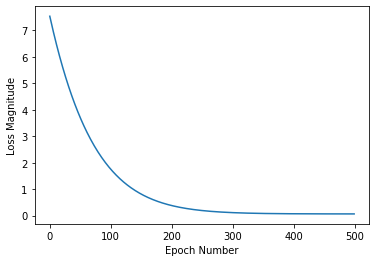

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [22]:
print(model.predict([100.0]))

[[211.74359]]


In [23]:
L0.get_weights()

[array([[1.7981676]], dtype=float32), array([31.926834], dtype=float32)]

In [26]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

model.fit(celsius_q, Farenheit_a, epochs=500, verbose=False)

print("Finished training the model")

Finished training the model


In [27]:

print(model.predict([100.0]))

print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))

print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.06201901,  0.0327783 , -0.2107765 ,  0.8284493 ]],
      dtype=float32), array([-3.2290957 , -2.069513  ,  0.89605254,  3.5457227 ], dtype=float32)]
These are the l1 variables: [array([[-0.3425239 , -0.5529485 ,  0.05874791,  0.48005542],
       [-0.50596327, -0.3036353 ,  0.22398815, -0.36893657],
       [ 0.0849465 ,  0.7980148 ,  0.8963464 ,  0.38651842],
       [ 0.89210266,  0.96746063, -0.07811767,  0.06047331]],
      dtype=float32), array([ 3.33333  ,  3.3309655,  2.1298227, -2.9559104], dtype=float32)]
These are the l2 variables: [array([[ 1.4001826 ],
       [ 1.4439886 ],
       [ 0.07460624],
       [-0.63512146]], dtype=float32), array([3.283226], dtype=float32)]
